## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.708396 -0.655396  1.624874 -0.507174  1.696076  0.308947
1  0.159150 -0.965853  1.150216 -0.431094  0.203892 -0.436050
2 -1.633384  1.905087 -0.006355  1.268488 -1.740486 -0.678451
3  0.727508 -1.609423 -0.662147  1.416915  0.744033 -0.235495
4 -0.355223 -1.606496  0.270757  0.031348  0.517798 -1.167927


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0257172	total: 56.7ms	remaining: 56.6s
1:	learn: 1.0137086	total: 57.1ms	remaining: 28.5s
2:	learn: 1.0034070	total: 57.6ms	remaining: 19.1s
3:	learn: 0.9929438	total: 58.2ms	remaining: 14.5s
4:	learn: 0.9841309	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9748808	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9630067	total: 60.9ms	remaining: 8.63s
7:	learn: 0.9517756	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9432717	total: 62ms	remaining: 6.83s
9:	learn: 0.9340280	total: 62.5ms	remaining: 6.18s
10:	learn: 0.9247969	total: 63.2ms	remaining: 5.68s
11:	learn: 0.9138121	total: 63.9ms	remaining: 5.26s
12:	learn: 0.9045354	total: 64.6ms	remaining: 4.91s
13:	learn: 0.8961142	total: 65ms	remaining: 4.58s
14:	learn: 0.8880960	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8792496	total: 66.1ms	remaining: 4.06s
16:	learn: 0.8703510	total: 66.7ms	remaining: 3.85s
17:	learn: 0.8627695	total: 67.2ms	remaining: 3.66s
18:	learn: 0.8538261	total: 67.6ms	remaining: 3.4

22:	learn: 0.8204650	total: 70.7ms	remaining: 3s
23:	learn: 0.8136739	total: 71.1ms	remaining: 2.89s
24:	learn: 0.8061872	total: 71.6ms	remaining: 2.79s
25:	learn: 0.7982656	total: 72ms	remaining: 2.7s
26:	learn: 0.7902892	total: 72.5ms	remaining: 2.61s
27:	learn: 0.7816765	total: 72.9ms	remaining: 2.53s
28:	learn: 0.7746514	total: 73.3ms	remaining: 2.46s
29:	learn: 0.7671837	total: 73.7ms	remaining: 2.38s
30:	learn: 0.7597853	total: 74.2ms	remaining: 2.32s
31:	learn: 0.7532466	total: 74.5ms	remaining: 2.25s
32:	learn: 0.7460970	total: 74.9ms	remaining: 2.19s
33:	learn: 0.7376869	total: 75.2ms	remaining: 2.14s
34:	learn: 0.7310183	total: 75.6ms	remaining: 2.08s
35:	learn: 0.7244216	total: 75.9ms	remaining: 2.03s
36:	learn: 0.7164543	total: 76.3ms	remaining: 1.99s
37:	learn: 0.7103812	total: 76.7ms	remaining: 1.94s
38:	learn: 0.7044565	total: 77.3ms	remaining: 1.9s
39:	learn: 0.6977486	total: 77.6ms	remaining: 1.86s
40:	learn: 0.6911492	total: 78ms	remaining: 1.82s
41:	learn: 0.6852281	

251:	learn: 0.1499678	total: 169ms	remaining: 502ms
252:	learn: 0.1491910	total: 170ms	remaining: 501ms
253:	learn: 0.1481719	total: 170ms	remaining: 500ms
254:	learn: 0.1473315	total: 171ms	remaining: 499ms
255:	learn: 0.1463755	total: 172ms	remaining: 498ms
256:	learn: 0.1452046	total: 172ms	remaining: 498ms
257:	learn: 0.1444291	total: 173ms	remaining: 496ms
258:	learn: 0.1432759	total: 173ms	remaining: 496ms
259:	learn: 0.1424940	total: 174ms	remaining: 495ms
260:	learn: 0.1413607	total: 174ms	remaining: 493ms
261:	learn: 0.1403240	total: 175ms	remaining: 492ms
262:	learn: 0.1393364	total: 175ms	remaining: 491ms
263:	learn: 0.1383369	total: 176ms	remaining: 489ms
264:	learn: 0.1374551	total: 176ms	remaining: 488ms
265:	learn: 0.1364541	total: 177ms	remaining: 487ms
266:	learn: 0.1356986	total: 177ms	remaining: 486ms
267:	learn: 0.1349191	total: 177ms	remaining: 485ms
268:	learn: 0.1340395	total: 178ms	remaining: 484ms
269:	learn: 0.1333576	total: 178ms	remaining: 483ms
270:	learn: 

416:	learn: 0.0584522	total: 252ms	remaining: 352ms
417:	learn: 0.0581514	total: 252ms	remaining: 351ms
418:	learn: 0.0577639	total: 253ms	remaining: 351ms
419:	learn: 0.0574282	total: 253ms	remaining: 350ms
420:	learn: 0.0571170	total: 254ms	remaining: 349ms
421:	learn: 0.0568360	total: 254ms	remaining: 348ms
422:	learn: 0.0565317	total: 255ms	remaining: 348ms
423:	learn: 0.0561589	total: 256ms	remaining: 347ms
424:	learn: 0.0558438	total: 256ms	remaining: 346ms
425:	learn: 0.0555446	total: 256ms	remaining: 346ms
426:	learn: 0.0553165	total: 257ms	remaining: 345ms
427:	learn: 0.0549578	total: 258ms	remaining: 344ms
428:	learn: 0.0546541	total: 258ms	remaining: 344ms
429:	learn: 0.0544349	total: 259ms	remaining: 343ms
430:	learn: 0.0541615	total: 260ms	remaining: 343ms
431:	learn: 0.0538804	total: 260ms	remaining: 342ms
432:	learn: 0.0534967	total: 261ms	remaining: 341ms
433:	learn: 0.0531542	total: 261ms	remaining: 341ms
434:	learn: 0.0528191	total: 262ms	remaining: 340ms
435:	learn: 

620:	learn: 0.0243760	total: 352ms	remaining: 215ms
621:	learn: 0.0242885	total: 352ms	remaining: 214ms
622:	learn: 0.0242292	total: 353ms	remaining: 214ms
623:	learn: 0.0241654	total: 354ms	remaining: 213ms
624:	learn: 0.0241068	total: 354ms	remaining: 213ms
625:	learn: 0.0240572	total: 355ms	remaining: 212ms
626:	learn: 0.0239359	total: 355ms	remaining: 211ms
627:	learn: 0.0238645	total: 356ms	remaining: 211ms
628:	learn: 0.0237656	total: 357ms	remaining: 210ms
629:	learn: 0.0236477	total: 357ms	remaining: 210ms
630:	learn: 0.0235228	total: 358ms	remaining: 209ms
631:	learn: 0.0234075	total: 358ms	remaining: 209ms
632:	learn: 0.0233095	total: 359ms	remaining: 208ms
633:	learn: 0.0231878	total: 359ms	remaining: 207ms
634:	learn: 0.0230929	total: 360ms	remaining: 207ms
635:	learn: 0.0230040	total: 360ms	remaining: 206ms
636:	learn: 0.0228850	total: 361ms	remaining: 205ms
637:	learn: 0.0227749	total: 361ms	remaining: 205ms
638:	learn: 0.0226671	total: 361ms	remaining: 204ms
639:	learn: 

779:	learn: 0.0128733	total: 434ms	remaining: 122ms
780:	learn: 0.0128556	total: 435ms	remaining: 122ms
781:	learn: 0.0127954	total: 436ms	remaining: 121ms
782:	learn: 0.0127430	total: 436ms	remaining: 121ms
783:	learn: 0.0126759	total: 436ms	remaining: 120ms
784:	learn: 0.0126167	total: 437ms	remaining: 120ms
785:	learn: 0.0125563	total: 437ms	remaining: 119ms
786:	learn: 0.0124946	total: 438ms	remaining: 118ms
787:	learn: 0.0124371	total: 438ms	remaining: 118ms
788:	learn: 0.0123829	total: 438ms	remaining: 117ms
789:	learn: 0.0123271	total: 439ms	remaining: 117ms
790:	learn: 0.0122628	total: 440ms	remaining: 116ms
791:	learn: 0.0121997	total: 440ms	remaining: 116ms
792:	learn: 0.0121381	total: 441ms	remaining: 115ms
793:	learn: 0.0120990	total: 441ms	remaining: 114ms
794:	learn: 0.0120596	total: 442ms	remaining: 114ms
795:	learn: 0.0120112	total: 442ms	remaining: 113ms
796:	learn: 0.0119801	total: 443ms	remaining: 113ms
797:	learn: 0.0119251	total: 443ms	remaining: 112ms
798:	learn: 

973:	learn: 0.0068685	total: 534ms	remaining: 14.3ms
974:	learn: 0.0068541	total: 535ms	remaining: 13.7ms
975:	learn: 0.0068251	total: 536ms	remaining: 13.2ms
976:	learn: 0.0068110	total: 536ms	remaining: 12.6ms
977:	learn: 0.0067845	total: 537ms	remaining: 12.1ms
978:	learn: 0.0067727	total: 537ms	remaining: 11.5ms
979:	learn: 0.0067451	total: 538ms	remaining: 11ms
980:	learn: 0.0067336	total: 539ms	remaining: 10.4ms
981:	learn: 0.0067044	total: 539ms	remaining: 9.88ms
982:	learn: 0.0066960	total: 540ms	remaining: 9.33ms
983:	learn: 0.0066822	total: 540ms	remaining: 8.78ms
984:	learn: 0.0066544	total: 541ms	remaining: 8.23ms
985:	learn: 0.0066408	total: 541ms	remaining: 7.68ms
986:	learn: 0.0066325	total: 542ms	remaining: 7.13ms
987:	learn: 0.0066192	total: 542ms	remaining: 6.58ms
988:	learn: 0.0065852	total: 543ms	remaining: 6.04ms
989:	learn: 0.0065698	total: 543ms	remaining: 5.49ms
990:	learn: 0.0065546	total: 544ms	remaining: 4.94ms
991:	learn: 0.0065391	total: 544ms	remaining: 4.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

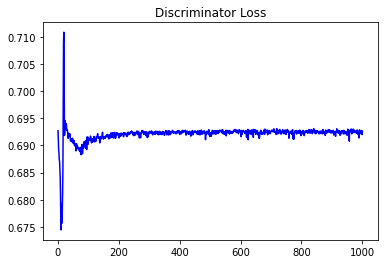

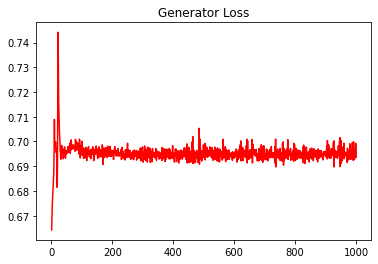

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03808590692403909


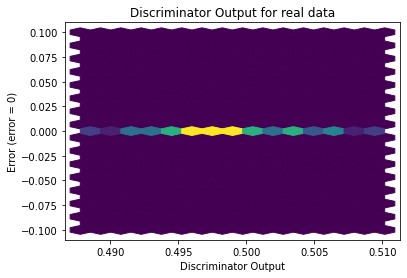

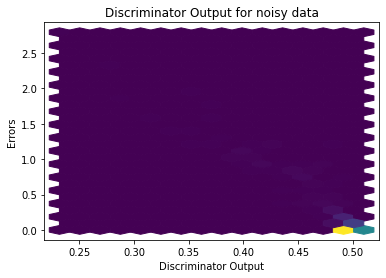

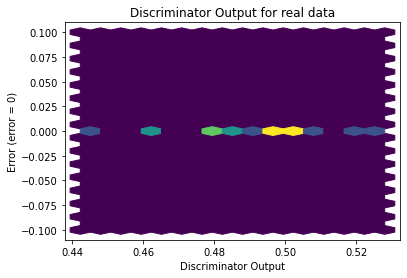

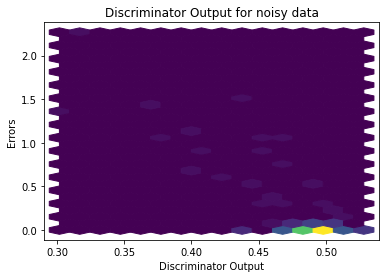

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


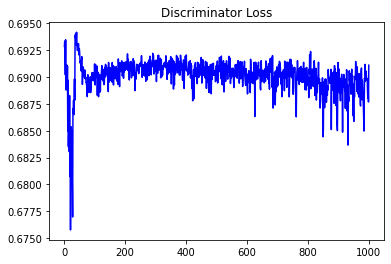

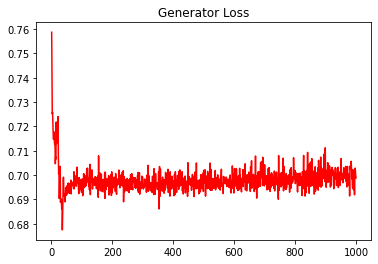

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03703258944552345


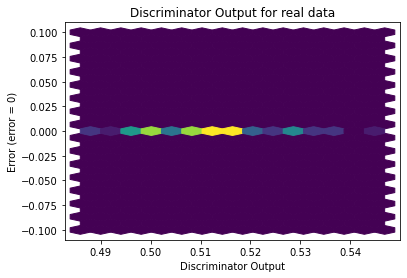

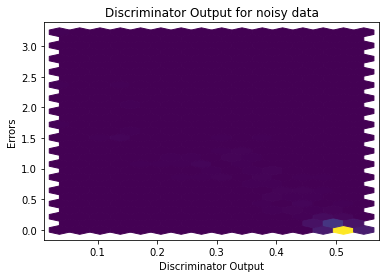

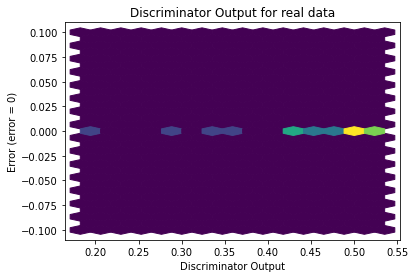

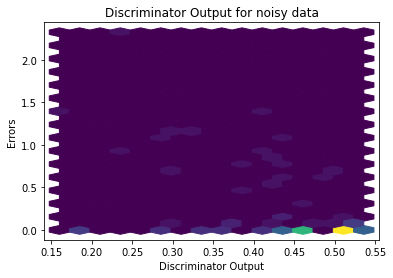

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1682]], requires_grad=True)
